In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML Project/nyc_taxi_trip_duration.csv')

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400.0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100.0
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635.0
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141.0
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848.0


## Data Dictionary
It is always a good idea to have the data dictionary handy.

 - **id** - a unique identifier for each trip
 - **vendor_id** - a code indicating the provider associated with the trip record
 - **pickup_datetime** - date and time when the meter was engaged
 - **dropoff_datetime** - date and time when the meter was disengaged
 - **passenger_count** - the number of passengers in the vehicle (driver entered value)
 - **pickup_longitude** - the longitude where the meter was engaged
 - **pickup_latitude** - the latitude where the meter was engaged
 - **dropoff_longitude** - the longitude where the meter was disengaged
 - **dropoff_latitude** - the latitude where the meter was disengaged
 - **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)
 - **trip_duration** - duration of the trip in seconds

In [ ]:
df.shape

(15667, 11)

In [ ]:
df.iloc[0,:]

id                              id1080784
vendor_id                               2
pickup_datetime       2016-02-29 16:40:21
dropoff_datetime      2016-02-29 16:47:01
passenger_count                         1
pickup_longitude               -73.953918
pickup_latitude                 40.778873
dropoff_longitude              -73.963875
dropoff_latitude                40.771164
store_and_fwd_flag                      N
trip_duration                       400.0
Name: 0, dtype: object

In [ ]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration         float64
dtype: object

# Checking for null values

In [ ]:
df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       1
dropoff_longitude     1
dropoff_latitude      1
store_and_fwd_flag    1
trip_duration         1
dtype: int64

# Checking for rows with null value

In [ ]:
df[df.isnull().any(axis=1)]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
15666,id0778393,1,2016-04-15 18:45:25,2016-04-15 18:58:36,1,-73.994164,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop(15666, inplace=True)

# Converting the date_time columns to datetime datatype

In [ ]:
# converting strings to datetime features
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)

In [ ]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                float64
dtype: object

In [ ]:
df['check_trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).map(lambda x: x.total_seconds())

duration_difference = df[np.abs(df['check_trip_duration'].values  - df['trip_duration'].values) > 1]
duration_difference.shape

(0, 12)

This implies that there is no inconsistency in data wrt the drop location and trip duration

# Converting Y/N column of store_and_fwd_flag to 1/0 respectively

In [ ]:
df['store_and_fwd_flag'] = 1 * (df.store_and_fwd_flag.values == 'Y')

In [ ]:
df['store_and_fwd_flag'].value_counts()

0    15603
1       63
Name: store_and_fwd_flag, dtype: int64

# Exploring the variable/features

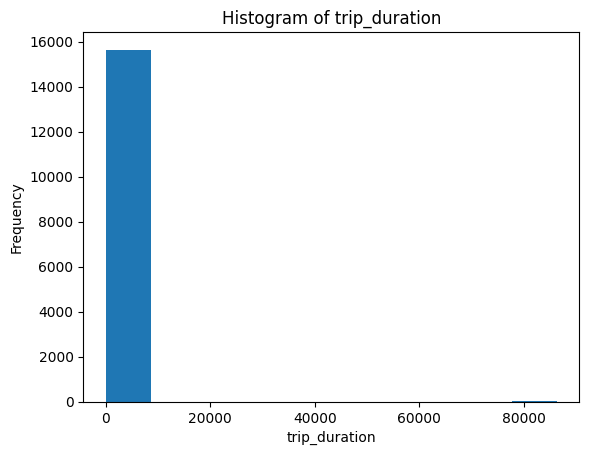

In [ ]:
plt.hist(df['trip_duration'], bins=10)  # You can adjust the number of bins as needed
plt.title('Histogram of trip_duration')
plt.xlabel('trip_duration')
plt.ylabel('Frequency')
plt.show()

# We can see an outlier from the histogram because of which the plot has become right skewed.
# Hence taking log normal so outlier influence can be reduced.

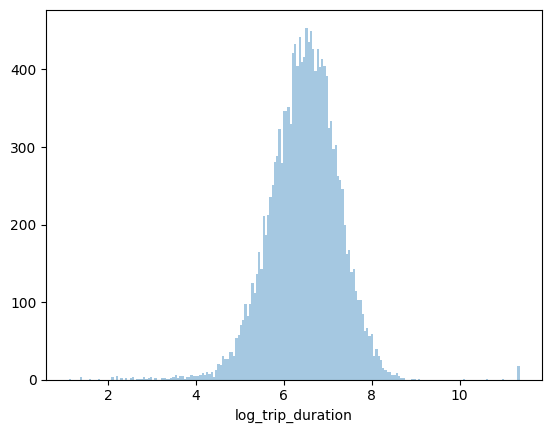

In [ ]:
df['log_trip_duration'] = np.log(df['trip_duration'].values + 1)
sns.distplot(df['log_trip_duration'], kde = False, bins = 200)
plt.show()

In [ ]:
df_y = np.log1p(df['trip_duration'])

In [ ]:
df.dtypes

id                             object
vendor_id                       int64
pickup_datetime        datetime64[ns]
dropoff_datetime       datetime64[ns]
passenger_count                 int64
pickup_longitude              float64
pickup_latitude               float64
dropoff_longitude             float64
dropoff_latitude              float64
store_and_fwd_flag              int64
trip_duration                 float64
check_trip_duration           float64
log_trip_duration             float64
dtype: object

Before we go on to build a model, we must drop the variables that should not be fed as features to the algorithms. We will drop
* id - Uniquely represents a sample in the train set
* pickup_datetime - Since we have extracted the datetime features, there is no need to keep the datetime column
* dropoff_datetime - If this is used to create features, it would be a leakage and we will get perfect model performance. Why? The time gap between dropoff_datetime and pickup_datetime is essentially what we are trying to predict
* trip_duration - This is the target variable so needs to be dropped
* store_and_fwd_flag - This variable is not available before the start of the trip and should not be used for modelling.

In [ ]:
df.drop('id', axis=1, inplace=True)

In [ ]:
df = df.drop(['pickup_datetime', 'dropoff_datetime', 'trip_duration','store_and_fwd_flag','check_trip_duration','log_trip_duration'], axis=1)

# Adding additional features to improve model

# Adding Distance features

Eucledian Distance
Let's Calculate the Eucledian distance between pickup and drop off location to get some idea on how far the pickup and dropoff points are since this would definitely impact the trip duration even though we know that cars can't fly

In [ ]:
#displacement
y_dist= df['pickup_longitude'] - df['dropoff_longitude']
x_dist = df['pickup_latitude'] - df['dropoff_latitude']

#square distance
df['dist_sq'] = (y_dist ** 2) + (x_dist ** 2)

#distance
df['dist_sqrt'] = df['dist_sq'] ** 0.5

In [ ]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,dist_sq,dist_sqrt
0,2,1,-73.953918,40.778873,-73.963875,40.771164,0.000159,0.012592
1,1,2,-73.988312,40.731743,-73.994751,40.694931,0.001397,0.037371
2,2,2,-73.997314,40.721458,-73.948029,40.774918,0.005287,0.072712
3,2,6,-73.961670,40.759720,-73.956779,40.780628,0.000461,0.021473
4,1,1,-74.017120,40.708469,-73.988182,40.740631,0.001872,0.043264


### Binning
The lattitude and longitude could be a bit noisy and it might be a good idea to bin them and create new features after rounding their values.

In [ ]:
### Binned Coordinates ###
df['pickup_latitude_round3'] = np.round(df['pickup_latitude'],3)
df['pickup_longitude_round3'] = np.round(df['pickup_longitude'],3)

df['dropoff_latitude_round3'] = np.round(df['dropoff_latitude'],3)
df['dropoff_longitude_round3'] = np.round(df['dropoff_longitude'],3)

#### One Hot Encoding
Here, Vendor ID can be converted to one hot encoding or frequency encoding since in the raw data it has values 1 and 2 without any inherent order.

In [ ]:
df = pd.get_dummies(df, columns=['vendor_id'], prefix='vendor_id')

In [ ]:
df.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,dist_sq,dist_sqrt,pickup_latitude_round3,pickup_longitude_round3,dropoff_latitude_round3,dropoff_longitude_round3,vendor_id_1,vendor_id_2
0,1,-73.953918,40.778873,-73.963875,40.771164,0.000159,0.012592,40.779,-73.954,40.771,-73.964,0,1
1,2,-73.988312,40.731743,-73.994751,40.694931,0.001397,0.037371,40.732,-73.988,40.695,-73.995,1,0
2,2,-73.997314,40.721458,-73.948029,40.774918,0.005287,0.072712,40.721,-73.997,40.775,-73.948,0,1
3,6,-73.961670,40.759720,-73.956779,40.780628,0.000461,0.021473,40.760,-73.962,40.781,-73.957,0,1
4,1,-74.017120,40.708469,-73.988182,40.740631,0.001872,0.043264,40.708,-74.017,40.741,-73.988,1,0


In [ ]:
np.sum(pd.isnull(df))

passenger_count             0
pickup_longitude            0
pickup_latitude             0
dropoff_longitude           0
dropoff_latitude            0
dist_sq                     0
dist_sqrt                   0
pickup_latitude_round3      0
pickup_longitude_round3     0
dropoff_latitude_round3     0
dropoff_longitude_round3    0
vendor_id_1                 0
vendor_id_2                 0
dtype: int64

We have all numerical data types in our dataset now. Time to delve into model building. A very simple baseline could just be the mean of the values in the train set. Let's check the performance on that.

In [ ]:
#Splitting the data into Train and Validation set
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df,df_y,test_size=1/3, random_state=10)

### Mean Prediction
Before we go on to try any machine learning model, let us look at the performance of a basic model that just says the mean of trip duration in the train set is the prediction for all the trips in the test set.

In [ ]:
mean_pred = np.repeat(ytrain.mean(),len(ytest))

sqrt(mean_squared_error(ytest, mean_pred))

0.7847920164721536

## Base model RMSE value is 0.78

##Implementing RMSE with cross validation

In [ ]:
param_grid = {}
lr = GridSearchCV(LinearRegression(),param_grid,scoring='neg_mean_squared_error')
lr.fit(xtrain,ytrain)
best_lr = lr.best_estimator_
train_val = best_lr.predict(xtrain)
pred_val = best_lr.predict(xtest)

In [ ]:
rmse_score_train = sqrt(mean_squared_error(ytrain, train_val))
rmse_score_lr = sqrt(mean_squared_error(ytest, pred_val))

In [ ]:
print(rmse_score_train,rmse_score_lr)

0.5475926799194626 0.5906041107884645


#RMSE for linear regression is 0.59,lower than base line model

## Implementing Decision Tree

In [ ]:
param_grid = {"min_samples_leaf":[5,25], "min_samples_split":[5,25]}
dt = GridSearchCV(DecisionTreeRegressor(),param_grid,scoring='neg_mean_squared_error')
dt.fit(xtrain,ytrain)
best_dt = dt.best_estimator_
train_val = best_dt.predict(xtrain)
pred_val = best_dt.predict(xtest)

In [ ]:
rmse_score_train = sqrt(mean_squared_error(ytrain, train_val))
rmse_score_dt = sqrt(mean_squared_error(ytest, pred_val))

In [ ]:
print(rmse_score_train,rmse_score_dt)

0.44029845911015586 0.49302902796595144


##RMSE is 0.49 after using Decision Tree

# There is further more improvement in RMSE by using decision tree

## Ensemble Models
Now that we have seen the performance of individual models, we have noted that decision tree has far better performance than other algorithms and it would be a good idea to try decision tree based ensemble models to check whether we improve on existing decision tree model or not.

##Implementing Bagging Algorithm Random Forest

### Random Forest

Random forests are an ensemble learning method for classification and regression that operates by constructing a multitude of decision trees at training time and outputing the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

Considering that we got a much more improved performance with decision trees. It is worthwhile to check tree based ensemble techniques.

In [ ]:
param_grid = {'random_state': [0], 'n_estimators': [19,30], 'max_depth': [5,10], 'n_jobs': [-1], "min_samples_split": [10,43]}
rf = GridSearchCV(RandomForestRegressor(),param_grid,scoring='neg_mean_squared_error')
rf.fit(xtrain,ytrain)
best_rf = rf.best_estimator_
train_val = best_rf.predict(xtrain)
pred_val = best_rf.predict(xtest)

In [ ]:
rmse_score_train = sqrt(mean_squared_error(ytrain, train_val))
rmse_score_rf = sqrt(mean_squared_error(ytest, pred_val))

In [ ]:
print(rmse_score_train,rmse_score_rf)

0.4219227463925875 0.4671030086156753


##RMSE is 0.47 after using Random Forest

##Implementing boosting algorithm XGBOOST

In [ ]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [ ]:
from xgboost.sklearn import XGBRegressor
param_grid_boost = {'n_estimators': [50],'learning_rate': [0.1],'max_depth': [3]}
xg = GridSearchCV(XGBRegressor(),param_grid_boost,scoring='neg_mean_squared_error')
xg.fit(xtrain,ytrain)
best_xg = xg.best_estimator_
train_val = best_xg.predict(xtrain)
pred_val = best_xg.predict(xtest)

In [ ]:
rmse_score_train = sqrt(mean_squared_error(ytrain, train_val))
rmse_score_xg = sqrt(mean_squared_error(ytest, pred_val))

In [ ]:
print(rmse_score_train,rmse_score_xg)

0.4219227463925875 0.4671030086156753


##RMSE is 0.467 after using XGBoost

## Averaging

First ensemble is an averaging model. Here, we simply take a weighted average of multiple models. The general rule here is to assign higher weight to the model which is giving better performance on the validation set.

In [ ]:
def cv_score_avg(ml_model_1, ml_model_2,w1 = 0.5, w2 = 0.5, rstate = 11,cols = df.columns):
    i = 1
    cv_scores = []
    df1 = df.copy()
    df1 = df[cols]

    kf = KFold(n_splits=5,random_state=rstate,shuffle=True)
    for train_index,test_index in kf.split(df1,df_y):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        xtr,xvl = df1.loc[train_index],df1.loc[test_index]
        ytr,yvl = df_y[train_index],df_y[test_index]

        model = ml_model_1
        ml_model_1.fit(xtr, ytr)
        pred_val_1 = ml_model_1.predict(xvl)

        model = ml_model_2
        ml_model_2.fit(xtr, ytr)
        pred_val_2 = ml_model_2.predict(xvl)

        final_pred=(pred_val_1*w1 + pred_val_2*w2)

        rmse_score = sqrt(mean_squared_error(yvl, final_pred))

        sufix = ""
        msg = ""
        msg += "Valid RMSE: {:.5f}".format(rmse_score)
        print("{}".format(msg))
        # Save scores
        cv_scores.append(rmse_score)
        i+=1
    return cv_scores

In [ ]:
avg_scores = cv_score_avg(best_xg, best_rf, w1 = 0.5, w2 = 0.5)


1 of kfold 5
Valid RMSE: 0.47592

2 of kfold 5
Valid RMSE: 0.49520

3 of kfold 5
Valid RMSE: 0.44935

4 of kfold 5
Valid RMSE: 0.48818

5 of kfold 5
Valid RMSE: 0.47227


In [ ]:
rmse_best_avg = 0.449

<Axes: >

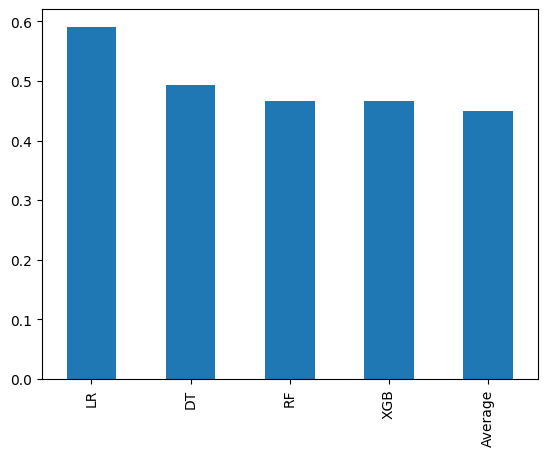

In [ ]:
results_df = pd.Series({'LR': rmse_score_lr,'DT': rmse_score_dt,'RF':rmse_score_rf,'XGB': rmse_score_xg,'Average': rmse_best_avg})
results_df.plot(y=["LR","DT","RF","XGB","Average"], kind="bar")

## Hence Average model comprising of XGBoost and Random Forest gives the minimum root mean square error for trip duration problem